In [35]:
print("hi")

hi


***Bird Species Observation Analysis in Forest and Grassland Ecosystem***

***Step 1: Data loading and converting***

In [4]:
import pandas as pd

# Load the forest dataset
forest_file_path = r'C:\Users\aswin\Downloads\Bird_Monitoring_Data_FOREST.XLSX'
forest_data = pd.ExcelFile(forest_file_path)
forest_sheets_dict = {sheet: forest_data.parse(sheet) for sheet in forest_data.sheet_names}
forest_combined_df = pd.concat(
    [df.assign(Habitat='Forest', Sheet=sheet_name) for sheet_name, df in forest_sheets_dict.items()],
    ignore_index=True
)

# Load the grassland dataset
grassland_file_path = r'C:\Users\aswin\Downloads\Bird_Monitoring_Data_GRASSLAND.XLSX'
grassland_data = pd.ExcelFile(grassland_file_path)
grassland_sheets_dict = {sheet: grassland_data.parse(sheet) for sheet in grassland_data.sheet_names}
grassland_combined_df = pd.concat(
    [df.assign(Habitat='Grassland', Sheet=sheet_name) for sheet_name, df in grassland_sheets_dict.items()],
    ignore_index=True
)

# Combine forest and grassland data into one DataFrame
combined_df = pd.concat([forest_combined_df, grassland_combined_df], ignore_index=True)

# Display combined dataset structure before cleaning
print("Combined Dataset Structure Before Cleaning:")
print(combined_df.head())
print(combined_df.info())

# Convert 'Date' column to datetime format
combined_df["Date"] = pd.to_datetime(combined_df["Date"], errors="coerce", format="%d-%m-%Y")

# Convert 'Start_Time' and 'End_Time' to proper time format
combined_df["Start_Time"] = pd.to_datetime(combined_df["Start_Time"], errors="coerce", format="%H:%M:%S").dt.time
combined_df["End_Time"] = pd.to_datetime(combined_df["End_Time"], errors="coerce", format="%H:%M:%S").dt.time

# Display combined dataset structure after cleaning
print("Combined Dataset Structure After Cleaning:")
print(combined_df.head())
print(combined_df.info())


C:\Users\aswin\AppData\Local\Temp\ipykernel_6880\685212783.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  grassland_combined_df = pd.concat(


Combined Dataset Structure Before Cleaning:
  Admin_Unit_Code Sub_Unit_Code Site_Name  Plot_Name Location_Type  Year  \
0            ANTI           NaN    ANTI 1  ANTI-0036        Forest  2018   
1            ANTI           NaN    ANTI 1  ANTI-0036        Forest  2018   
2            ANTI           NaN    ANTI 1  ANTI-0036        Forest  2018   
3            ANTI           NaN    ANTI 1  ANTI-0036        Forest  2018   
4            ANTI           NaN    ANTI 1  ANTI-0036        Forest  2018   

        Date Start_Time  End_Time          Observer  ... Temperature  \
0 2018-05-22   06:19:00  06:29:00  Elizabeth Oswald  ...        19.9   
1 2018-05-22   06:19:00  06:29:00  Elizabeth Oswald  ...        19.9   
2 2018-05-22   06:19:00  06:29:00  Elizabeth Oswald  ...        19.9   
3 2018-05-22   06:19:00  06:29:00  Elizabeth Oswald  ...        19.9   
4 2018-05-22   06:19:00  06:29:00  Elizabeth Oswald  ...        19.9   

    Humidity              Sky                                   Wi

In [ ]:
# Save the combined and cleaned DataFrame to a new CSV file in an alternate location or with a different name
combined_df.to_csv(r'C:\Users\aswin\3D Objects\guvi_project\Brid-species-observation-analysis\combined_data_cleaned.csv', index=False)

print("File saved successfully.")

File saved successfully.


***Clean and Preprocess the Dataset. Handle missing values, duplicates, and outliers***

In [6]:
# Define a function to fill NaN values with the mode (or median)
def fill_missing_times(group):
    group["Start_Time"] = group["Start_Time"].fillna(group["Start_Time"].mode()[0] if not group["Start_Time"].mode().empty else group["Start_Time"].median())
    group["End_Time"] = group["End_Time"].fillna(group["End_Time"].mode()[0] if not group["End_Time"].mode().empty else group["End_Time"].median())
    return group

# Apply the function to fill missing Start_Time and End_Time based on Date
combined_df = combined_df.groupby("Date").apply(fill_missing_times)

# Display the updated state of Start_Time and End_Time columns
print(combined_df[['Date', 'Start_Time', 'End_Time']].head())


C:\Users\aswin\AppData\Local\Temp\ipykernel_6880\2833949246.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  combined_df = combined_df.groupby("Date").apply(fill_missing_times)


                      Date Start_Time  End_Time
Date                                           
2018-05-07 4619 2018-05-07   06:20:00  06:30:00
           4620 2018-05-07   06:20:00  06:30:00
           4621 2018-05-07   06:20:00  06:30:00
           4622 2018-05-07   06:20:00  06:30:00
           4623 2018-05-07   06:20:00  06:30:00


In [ ]:
combined_df.to_csv(r'C:\Users\aswin\3D Objects\guvi_project\Brid-species-observation-analysis\combined_data_cleaned.csv', index=False)

In [8]:
print(combined_df.columns)
print(combined_df.info())

Index(['Admin_Unit_Code', 'Sub_Unit_Code', 'Site_Name', 'Plot_Name',
       'Location_Type', 'Year', 'Date', 'Start_Time', 'End_Time', 'Observer',
       'Visit', 'Interval_Length', 'ID_Method', 'Distance', 'Flyover_Observed',
       'Sex', 'Common_Name', 'Scientific_Name', 'AcceptedTSN', 'NPSTaxonCode',
       'AOU_Code', 'PIF_Watchlist_Status', 'Regional_Stewardship_Status',
       'Temperature', 'Humidity', 'Sky', 'Wind', 'Disturbance',
       'Initial_Three_Min_Cnt', 'Habitat', 'Sheet', 'TaxonCode',
       'Previously_Obs'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 17077 entries, (Timestamp('2018-05-07 00:00:00'), np.int64(4619)) to (Timestamp('2018-07-19 00:00:00'), np.int64(12108))
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Admin_Unit_Code              17077 non-null  object        
 1   Sub_Unit_Code                722 non-nu

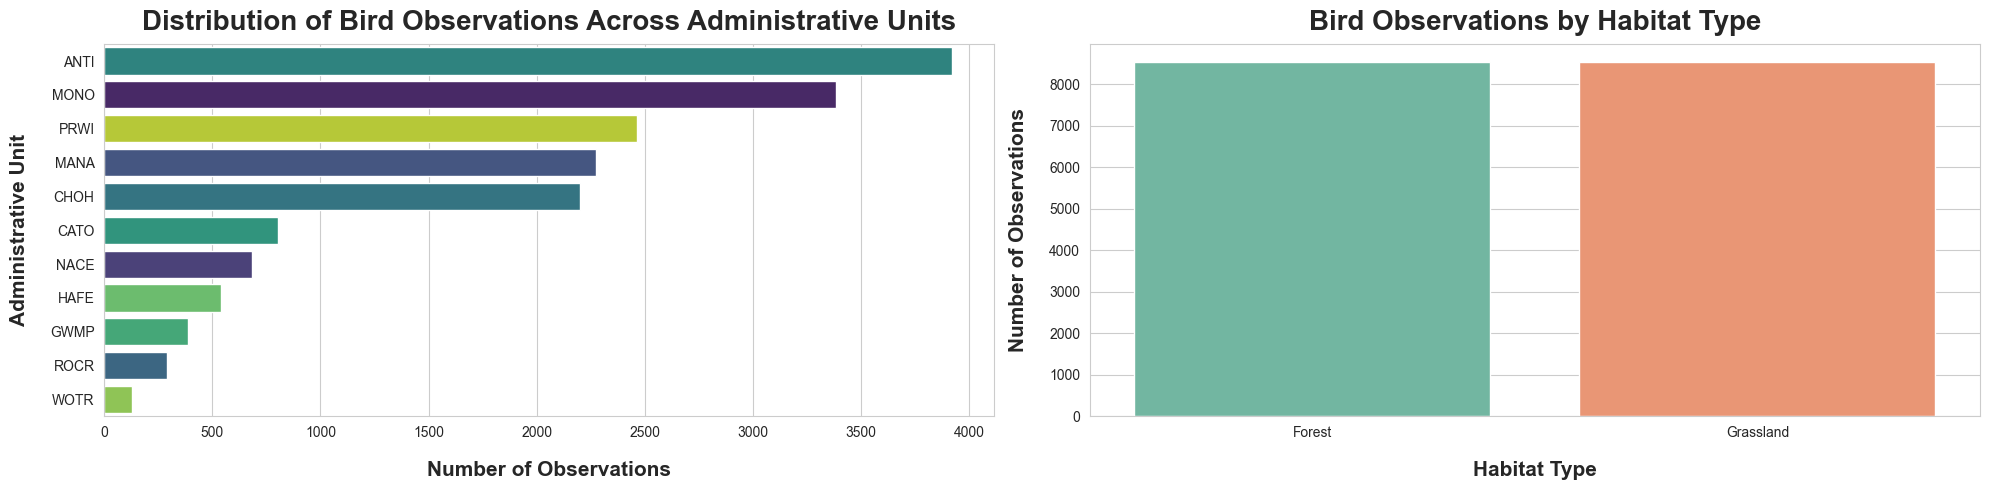

Processed data saved as C:\Users\aswin\3D Objects\guvi_project\Brid-species-observation-analysis\processed_data.csv


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned combined dataset
combined_df = pd.read_csv(r'C:\Users\aswin\3D Objects\guvi_project\Brid-species-observation-analysis\combined_data_cleaned.csv', low_memory=False)

# Set plot style
sns.set_style("whitegrid")

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

# Plot 1: Count of species observed in different administrative units
sns.countplot(data=combined_df, y="Admin_Unit_Code", order=combined_df["Admin_Unit_Code"].value_counts().index, hue="Admin_Unit_Code", palette="viridis", ax=ax1, legend=False)
ax1.set_xlabel("Number of Observations", labelpad=15, fontsize=15, fontweight="bold")
ax1.set_ylabel("Administrative Unit", labelpad=15, fontsize=15, fontweight="bold")
ax1.set_title("Distribution of Bird Observations Across Administrative Units", pad=10, fontsize=20, fontweight="bold")

# Plot 2: Count of species across habitat types
sns.countplot(data=combined_df, x="Habitat", order=combined_df["Habitat"].value_counts().index, hue="Habitat", palette="Set2", ax=ax2, legend=False)
ax2.set_xlabel("Habitat Type", labelpad=15, fontsize=15, fontweight="bold")
ax2.set_ylabel("Number of Observations", labelpad=15, fontsize=15, fontweight="bold")
ax2.set_title("Bird Observations by Habitat Type", pad=10, fontsize=20, fontweight="bold")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Save processed data
output_path = r'C:\Users\aswin\3D Objects\guvi_project\Brid-species-observation-analysis\processed_data.csv'
combined_df.to_csv(output_path, index=False)
print(f"Processed data saved as {output_path}")


***Temporal Analysis: Seasonal Trends & Observation Time***


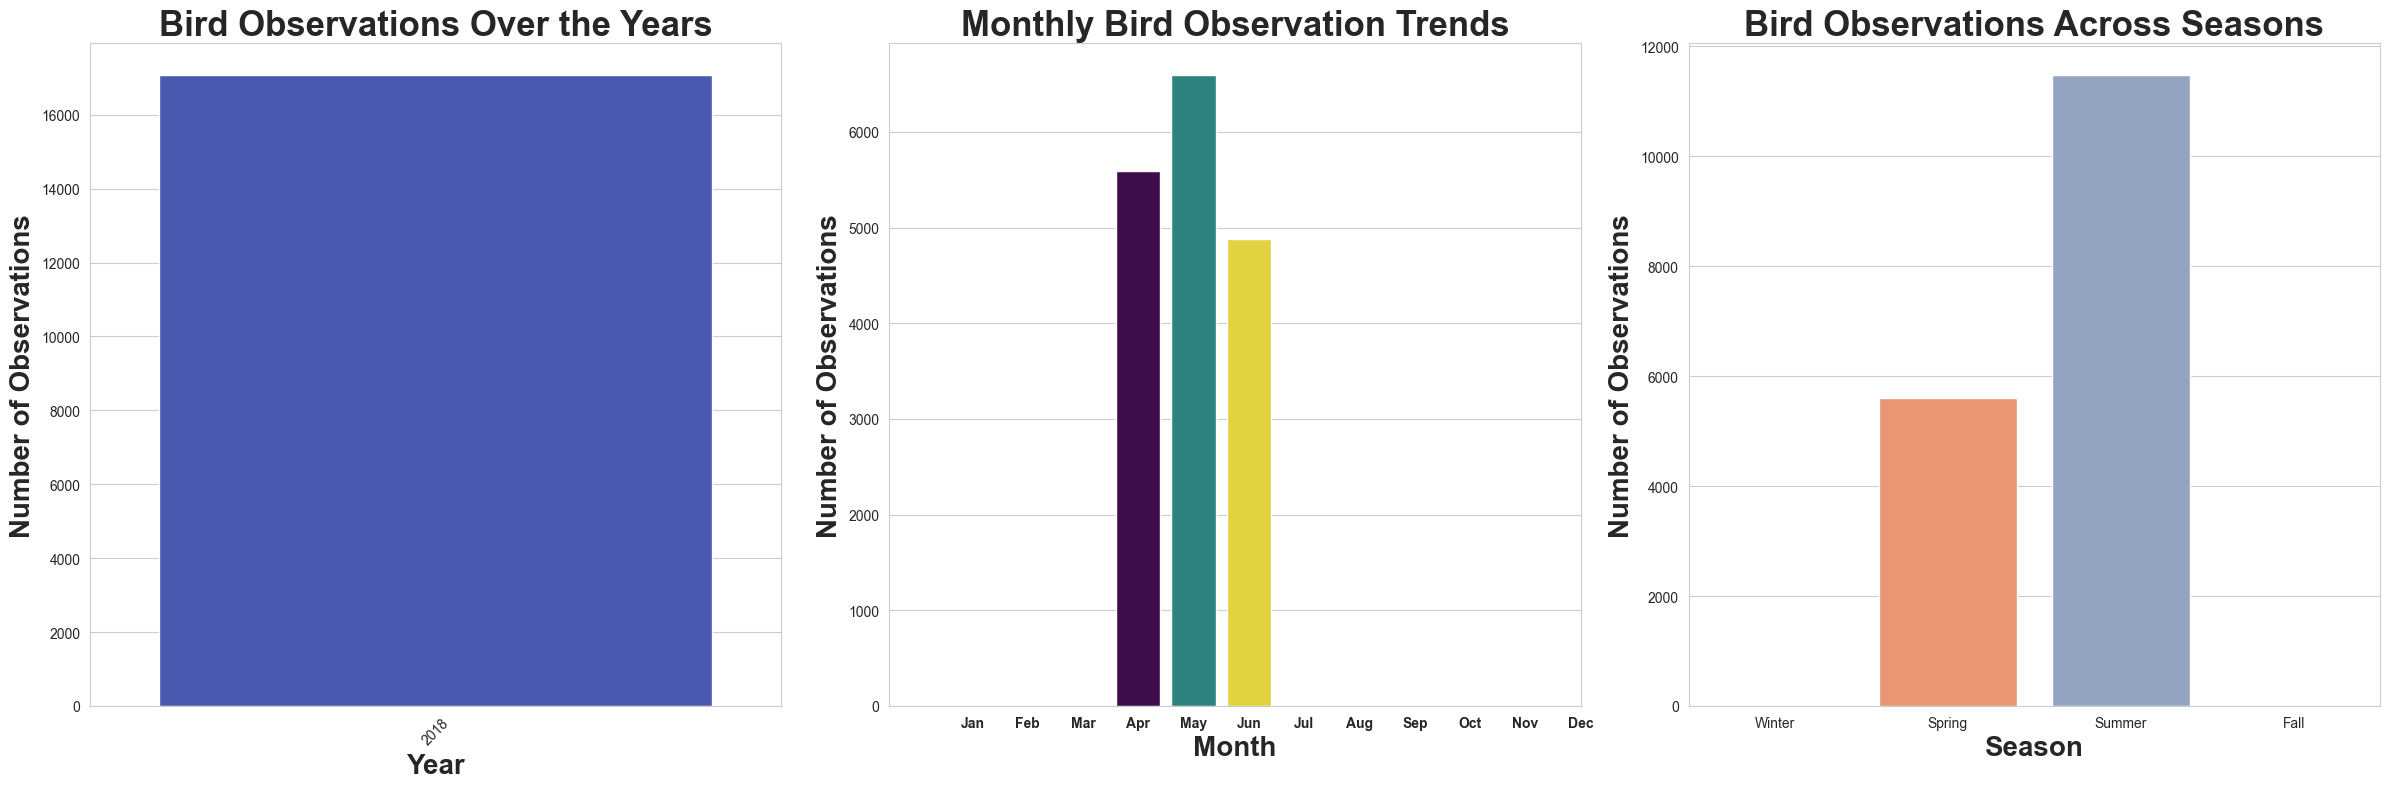

Processed data saved as C:\Users\aswin\3D Objects\guvi_project\Brid-species-observation-analysis\processed_data.csv


In [11]:
import pandas as pd

# Load your dataset with low_memory=False to avoid DtypeWarning
combined_df = pd.read_csv(r'C:\Users\aswin\3D Objects\guvi_project\Brid-species-observation-analysis\combined_data_cleaned.csv', low_memory=False)

# Continue with the rest of your code
# Convert Date column to datetime
combined_df["Date"] = pd.to_datetime(combined_df["Date"], errors='coerce')

# Extract Month from Date
combined_df["Month"] = combined_df["Date"].dt.month

# Define a function to map months to seasons
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Fall"
    else:
        return None

# Apply the function to create the Season column
combined_df["Season"] = combined_df["Month"].apply(get_season)

# Define colors explicitly
year_palette = "coolwarm"
month_palette = "viridis"
season_palette = "Set2"

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# Plot yearly trend
sns.countplot(data=combined_df, x="Year", hue="Year", palette=year_palette, order=sorted(combined_df["Year"].dropna().unique()), ax=axes[0])
axes[0].set_xlabel("Year", fontsize=20, fontweight="bold")
axes[0].set_ylabel("Number of Observations", fontsize=20, fontweight="bold")
axes[0].set_title("Bird Observations Over the Years", fontsize=25, fontweight="bold")
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend([], [], frameon=False)  # Hide legend

# Plot monthly trend
sns.countplot(data=combined_df, x="Month", hue="Month", palette=month_palette, order=range(1, 13), ax=axes[1])
axes[1].set_xlabel("Month", fontsize=20, fontweight="bold")
axes[1].set_ylabel("Number of Observations", fontsize=20, fontweight="bold")
axes[1].set_title("Monthly Bird Observation Trends", fontsize=25, fontweight="bold")
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], fontsize=10, fontweight="bold")
axes[1].legend([], [], frameon=False)  # Hide legend

# Plot seasonal trend
sns.countplot(data=combined_df, x="Season", hue="Season", palette=season_palette, order=["Winter", "Spring", "Summer", "Fall"], ax=axes[2], hue_order=["Winter", "Spring", "Summer", "Fall"])   
axes[2].set_xlabel("Season", fontsize=20, fontweight="bold")
axes[2].set_ylabel("Number of Observations", fontsize=20, fontweight="bold")
axes[2].set_title("Bird Observations Across Seasons", fontsize=25, fontweight="bold")
axes[2].legend([], [], frameon=False)  # Hide legend

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


# Save processed data
output_path = r'C:\Users\aswin\3D Objects\guvi_project\Brid-species-observation-analysis\processed_data.csv'
combined_df.to_csv(output_path, index=False)
print(f"Processed data saved as {output_path}")

***Spatial Analysis: Location Insights & Observation Time***  

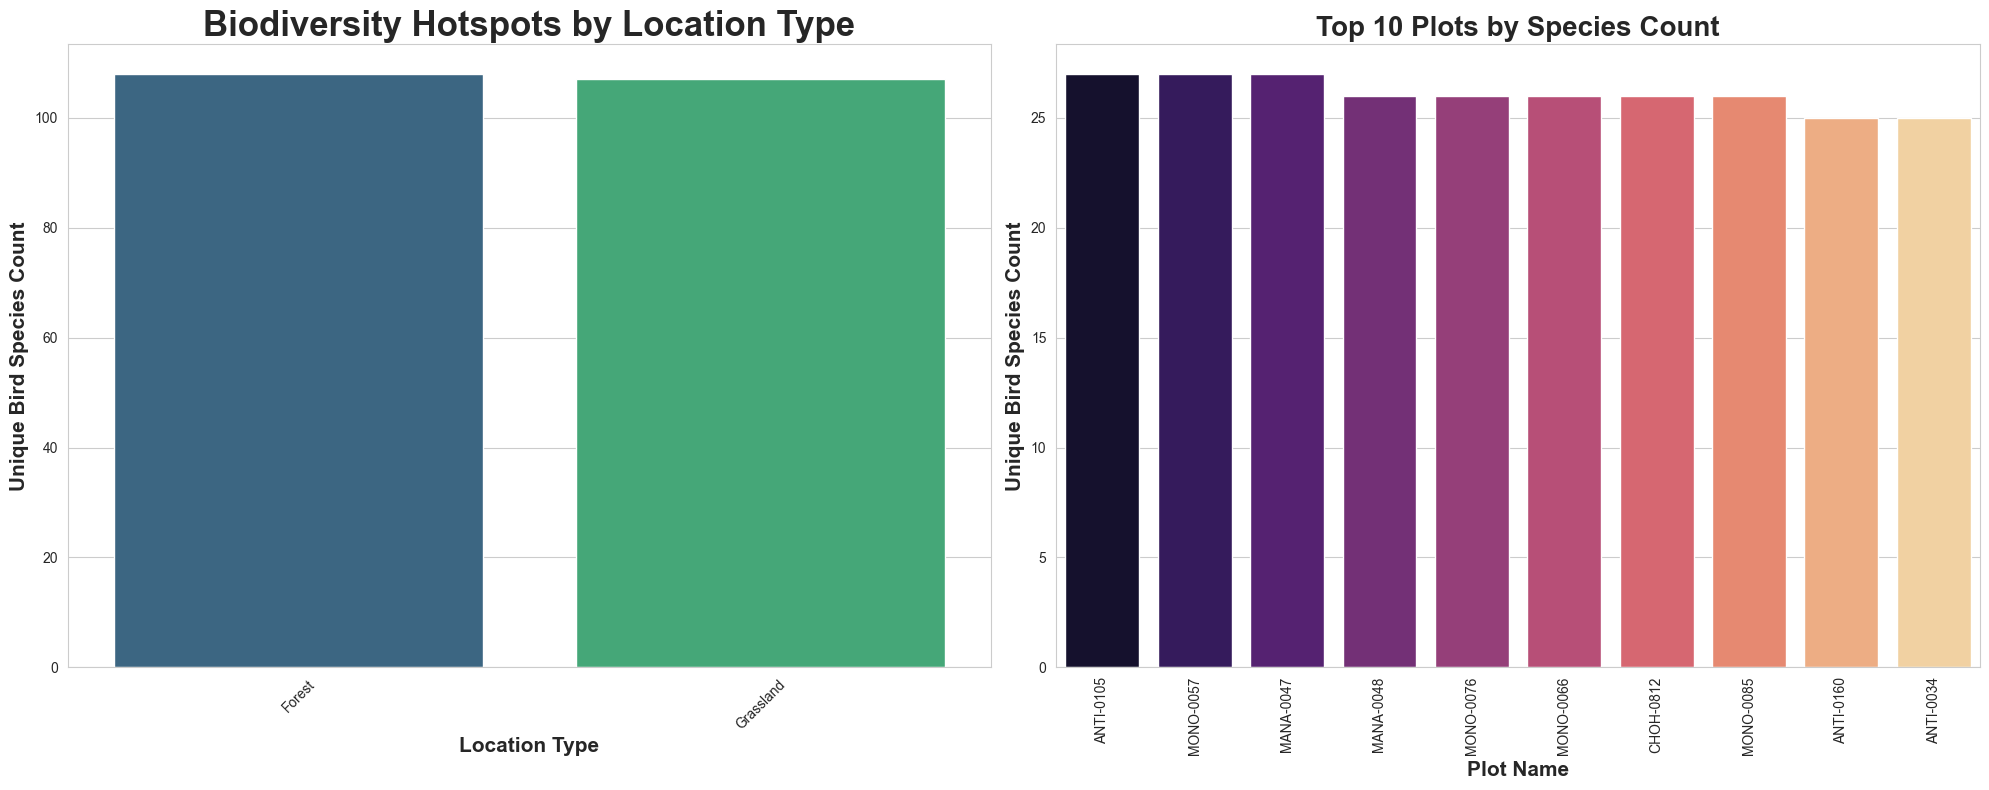

Processed data saved as C:\Users\aswin\3D Objects\guvi_project\Brid-species-observation-analysis\processed_data.csv


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your dataset with specified dtypes
combined_df = pd.read_csv(r'C:\Users\aswin\3D Objects\guvi_project\Brid-species-observation-analysis\combined_data_cleaned.csv', low_memory=False)

# Set up a 1x2 grid for all plots
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Count unique bird species observed per Location_Type
location_biodiversity = combined_df.groupby("Location_Type")["Common_Name"].nunique().sort_values(ascending=False)

# Count unique bird species per Plot_Name
plot_biodiversity = combined_df.groupby("Plot_Name")["Common_Name"].nunique().sort_values(ascending=False)

# Display the top biodiversity locations and plots
location_biodiversity.head(10), plot_biodiversity.head(10)

# Create a bar chart for Location-Type biodiversity
sns.barplot(x=location_biodiversity.index, y=location_biodiversity.values, palette="viridis", ax=axs[0], hue=location_biodiversity.index)
axs[0].set_xlabel("Location Type", fontsize=15, fontweight="bold")
axs[0].set_ylabel("Unique Bird Species Count", fontsize=15, fontweight="bold")
axs[0].set_title("Biodiversity Hotspots by Location Type", fontsize=25, fontweight="bold")
axs[0].tick_params(axis='x', rotation=45)

# Create a bar chart for top 10 biodiversity plots
sns.barplot(x=plot_biodiversity.head(10).index, y=plot_biodiversity.head(10).values, palette="magma", ax=axs[1], hue=plot_biodiversity.head(10).index)
axs[1].set_xlabel("Plot Name", fontsize=15, fontweight="bold")
axs[1].set_ylabel("Unique Bird Species Count", fontsize=15, fontweight="bold")
axs[1].set_title("Top 10 Plots by Species Count", fontsize=20, fontweight="bold")
axs[1].tick_params(axis='x', rotation=90)

# Adjust layout
fig.tight_layout()
plt.show()

# Save processed data
output_path = r'C:\Users\aswin\3D Objects\guvi_project\Brid-species-observation-analysis\processed_data.csv'
combined_df.to_csv(output_path, index=False)
print(f"Processed data saved as {output_path}")


***Species Analysis: Diversity Metrics, Activity Patterns and Sex Ratio***

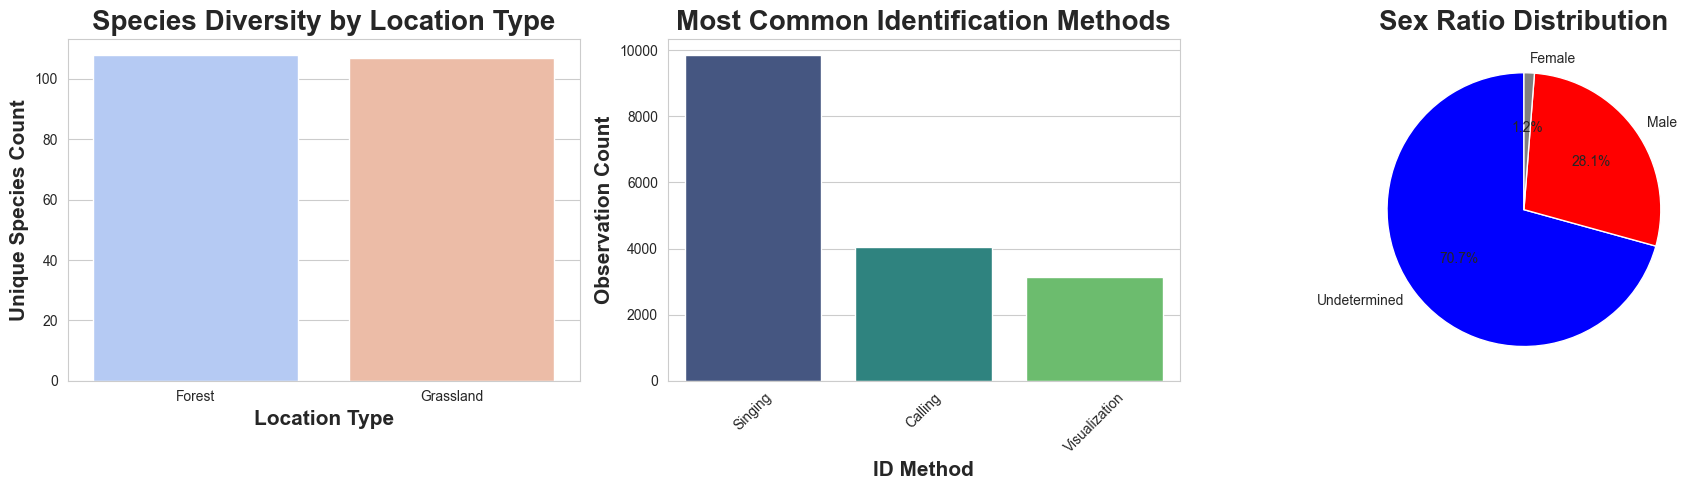

Processed data saved as C:\Users\aswin\3D Objects\guvi_project\Brid-species-observation-analysis\processed_data.csv


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your dataset with specified dtypes
combined_df = pd.read_csv(r'C:\Users\aswin\3D Objects\guvi_project\Brid-species-observation-analysis\combined_data_cleaned.csv', low_memory=False)

# 1. Diversity Metrics - Unique species per Location_Type
species_diversity = combined_df.groupby("Location_Type")["Scientific_Name"].nunique().sort_values(ascending=False)

# 2. Activity Patterns - Count occurrences of Interval_Length & ID_Method
interval_counts = combined_df["Interval_Length"].value_counts()
id_method_counts = combined_df["ID_Method"].value_counts()

# 3. Sex Ratio Analysis - Count male vs. female occurrences
sex_counts = combined_df["Sex"].value_counts()

# Display results
species_diversity, interval_counts.head(10), id_method_counts.head(10), sex_counts

# Create visualizations for species diversity, activity patterns, and sex ratio
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Bar chart for species diversity across Location_Type
sns.barplot(x=species_diversity.index, y=species_diversity.values, palette="coolwarm", ax=axes[0], hue=species_diversity.index, dodge=False)
axes[0].set_title("Species Diversity by Location Type", fontsize=20, fontweight="bold")
axes[0].set_xlabel("Location Type", fontsize=15, fontweight="bold")
axes[0].set_ylabel("Unique Species Count", fontsize=15, fontweight="bold")

# 2. Bar chart for ID Method distribution
sns.barplot(x=id_method_counts.index, y=id_method_counts.values, palette="viridis", ax=axes[1], hue=id_method_counts.index, dodge=False)
axes[1].set_title("Most Common Identification Methods", fontsize=20, fontweight="bold")
axes[1].set_xlabel("ID Method", fontsize=15, fontweight="bold")
axes[1].set_ylabel("Observation Count", fontsize=15, fontweight="bold")
for tick in axes[1].get_xticklabels():
    tick.set_rotation(45)

# 3. Pie chart for Sex Ratio
axes[2].pie(sex_counts.values, labels=sex_counts.index, autopct='%1.1f%%', colors=["blue", "red", "gray"], startangle=90)
axes[2].set_title("Sex Ratio Distribution", fontsize=20, fontweight="bold")

# Show plots
fig.tight_layout()
plt.show()


# Save processed data
output_path = r'C:\Users\aswin\3D Objects\guvi_project\Brid-species-observation-analysis\processed_data.csv'
combined_df.to_csv(output_path, index=False)
print(f"Processed data saved as {output_path}")

***Environmental Conditions: Weather Correlation and Disturbance Effect***

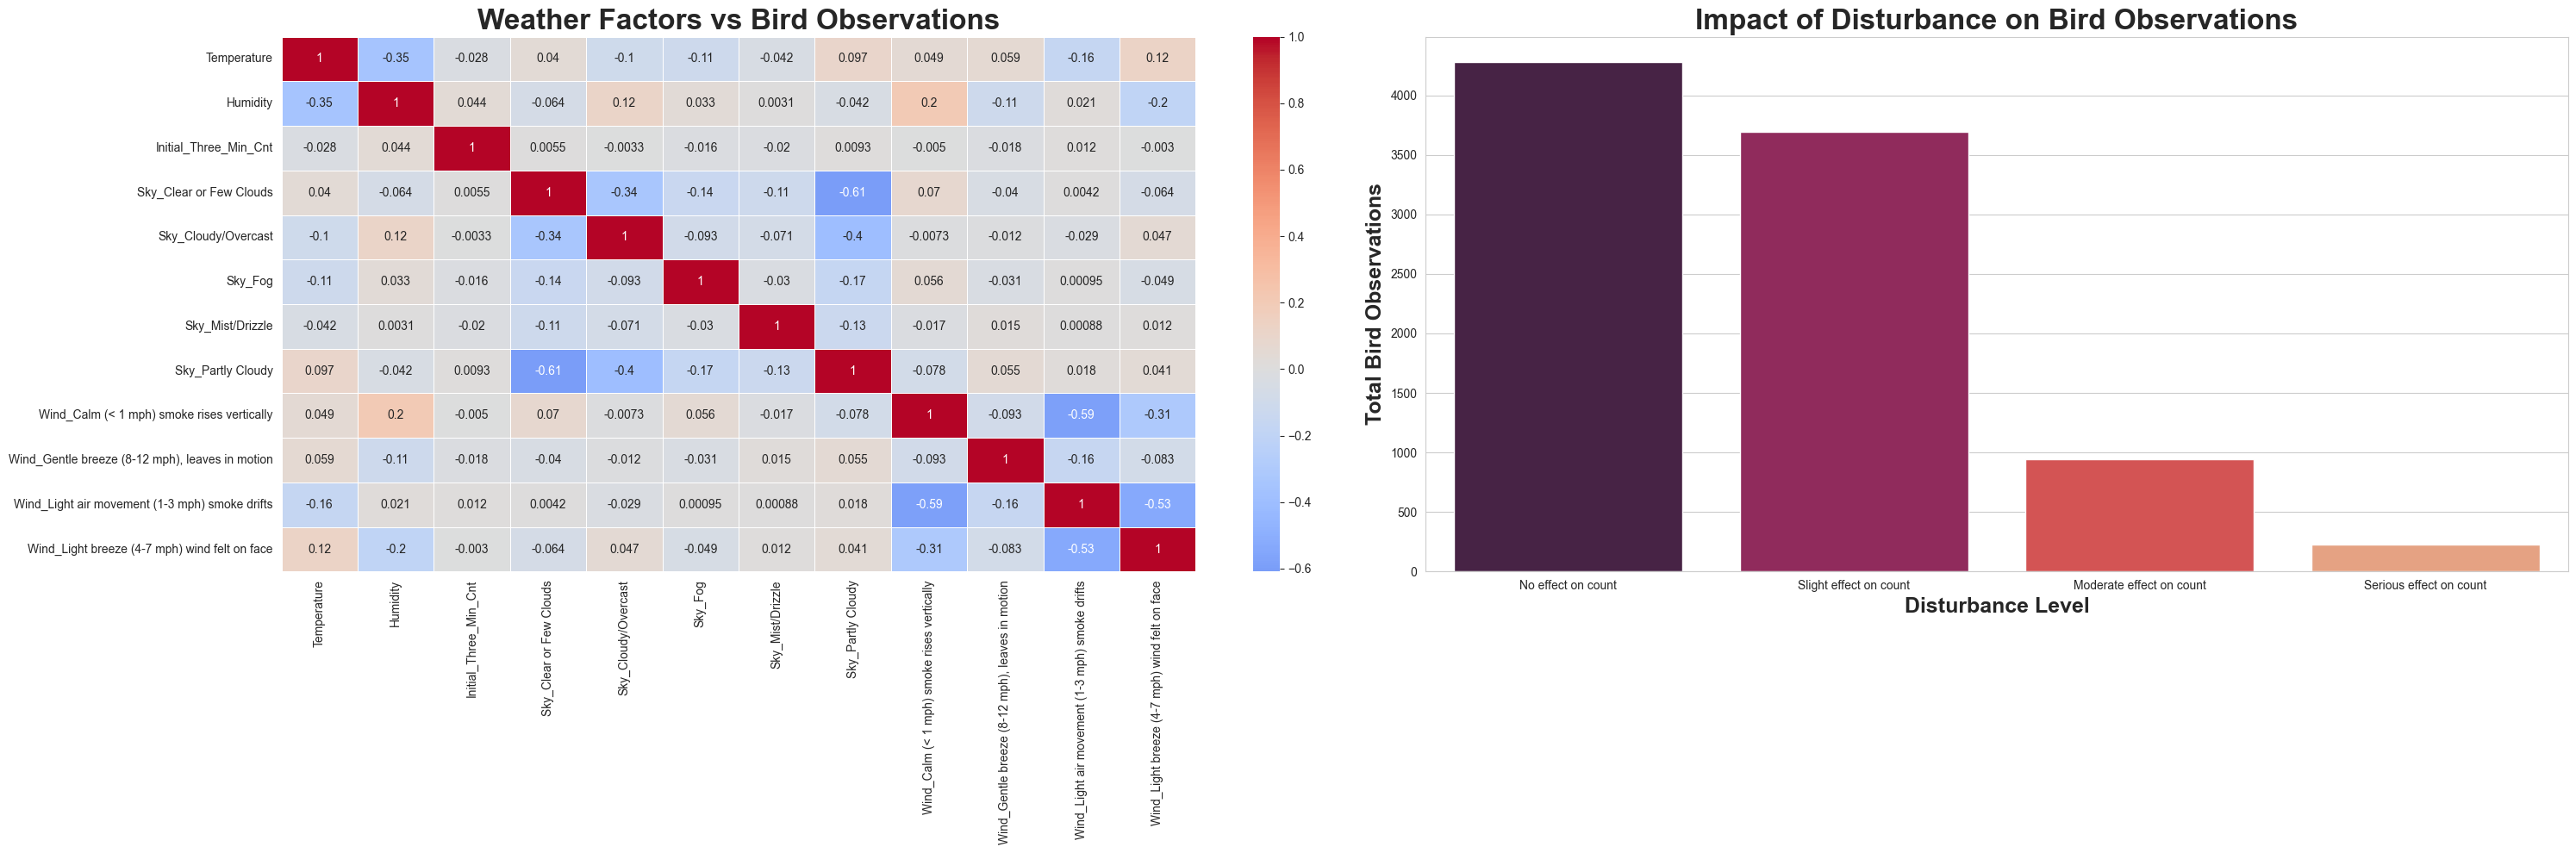

Processed data saved as C:\Users\aswin\3D Objects\guvi_project\Brid-species-observation-analysis\processed_data.csv


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset with specified dtypes
combined_df = pd.read_csv(r'C:\Users\aswin\3D Objects\guvi_project\Brid-species-observation-analysis\combined_data_cleaned.csv', low_memory=False)

# Encode categorical columns 'Sky' and 'Wind'
sky_encoded = pd.get_dummies(combined_df['Sky'], prefix='Sky')
wind_encoded = pd.get_dummies(combined_df['Wind'], prefix='Wind')

# Combine encoded columns with the original dataframe
combined_df = pd.concat([combined_df, sky_encoded, wind_encoded], axis=1)

# 1. Weather Correlation - Using "Initial_Three_Min_Cnt" as bird observation count
weather_factors = ["Temperature", "Humidity", "Initial_Three_Min_Cnt"] + sky_encoded.columns.tolist() + wind_encoded.columns.tolist()
correlation_matrix = combined_df[weather_factors].corr()

# 2. Disturbance Effect - Count bird observations per Disturbance category
disturbance_effect = combined_df.groupby("Disturbance")["Initial_Three_Min_Cnt"].sum().sort_values(ascending=False)

# Display correlation of weather factors with bird observations
correlation_matrix["Initial_Three_Min_Cnt"], disturbance_effect

# Create visualizations for weather correlation and disturbance effects

fig, axes = plt.subplots(1, 2, figsize=(30, 10))

# 1. Heatmap for Weather Correlation
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0, linewidths=0.5, ax=axes[0])
axes[0].set_title("Weather Factors vs Bird Observations", fontsize=24, fontweight="bold")

# 2. Bar Chart for Disturbance Effects
sns.barplot(x=disturbance_effect.index, y=disturbance_effect.values, palette="rocket", ax=axes[1], hue=disturbance_effect.index, dodge=False)
axes[1].set_title("Impact of Disturbance on Bird Observations", fontsize=24, fontweight="bold")
axes[1].set_xlabel("Disturbance Level", fontsize=18, fontweight="bold")
axes[1].set_ylabel("Total Bird Observations", fontsize=18, fontweight="bold")

# Show plots
plt.tight_layout()
plt.show()

# Save processed data
output_path = r'C:\Users\aswin\3D Objects\guvi_project\Brid-species-observation-analysis\processed_data.csv'
combined_df.to_csv(output_path, index=False)
print(f"Processed data saved as {output_path}")

***Distance and Behavior: Distance Analysis and Flyover Frequency***

In [17]:
file_path = r'C:\Users\aswin\3D Objects\guvi_project\Brid-species-observation-analysis\combined_data_cleaned.csv'
combined_df = pd.read_csv(file_path, dtype=str)  # Load everything as text
print(combined_df["Distance"].unique())  # Check raw distance values


['<= 50 Meters' '50 - 100 Meters' nan]


In [18]:
combined_df = pd.read_csv(file_path, dtype=str)  # Load as text to inspect
print(combined_df["Distance"].head(10))

0       <= 50 Meters
1    50 - 100 Meters
2       <= 50 Meters
3       <= 50 Meters
4       <= 50 Meters
5    50 - 100 Meters
6       <= 50 Meters
7    50 - 100 Meters
8       <= 50 Meters
9    50 - 100 Meters
Name: Distance, dtype: object


In [19]:
print(combined_df.shape)  # Is the dataset empty?
print(combined_df.isna().sum())  # Count missing values

(17077, 33)
Admin_Unit_Code                    0
Sub_Unit_Code                  16355
Site_Name                       8531
Plot_Name                          0
Location_Type                      0
Year                               0
Date                               0
Start_Time                         0
End_Time                           0
Observer                           0
Visit                              0
Interval_Length                    0
ID_Method                          2
Distance                        1486
Flyover_Observed                   0
Sex                             5183
Common_Name                        0
Scientific_Name                    0
AcceptedTSN                       33
NPSTaxonCode                    8531
AOU_Code                           0
PIF_Watchlist_Status               0
Regional_Stewardship_Status        0
Temperature                        0
Humidity                           0
Sky                                0
Wind                      

In [20]:
print(combined_df["Distance"].dropna().sample(10))  # Show 10 non-null values

16924    50 - 100 Meters
14078    50 - 100 Meters
15452    50 - 100 Meters
8951     50 - 100 Meters
10062    50 - 100 Meters
7296     50 - 100 Meters
10031       <= 50 Meters
5114     50 - 100 Meters
13676    50 - 100 Meters
10122       <= 50 Meters
Name: Distance, dtype: object


In [21]:
combined_df["Distance"] = combined_df["Distance"].str.encode('ascii', 'ignore').str.decode('ascii')

In [22]:
combined_df["Distance"] = combined_df["Distance"].str.strip().replace({
    "<= 50 Meters": 50,
    "50 - 100 Meters": 75
}, regex=True)


C:\Users\aswin\AppData\Local\Temp\ipykernel_6880\1266005796.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_df["Distance"] = combined_df["Distance"].str.strip().replace({


In [23]:
print(combined_df["Distance"].unique())
print(combined_df["Distance"].dtype)

[50. 75. nan]
float64


In [24]:
species_distance = combined_df.groupby("Common_Name")["Distance"].mean().sort_values()

print("Closest Observed Species:")
print(species_distance.head(10))  # Top 10 closest species

print("\nFarthest Observed Species:")
print(species_distance.tail(10))  # Top 10 farthest species

Closest Observed Species:
Common_Name
Yellow-throated Warbler      50.0
Least Flycatcher             50.0
Blue-winged Warbler          50.0
Mallard                      50.0
Cape May Warbler             50.0
Green Heron                  50.0
Ruby-throated Hummingbird    50.0
Kentucky Warbler             50.0
Savannah Sparrow             50.0
Great Blue Heron             50.0
Name: Distance, dtype: float64

Farthest Observed Species:
Common_Name
Chestnut-sided Warbler    75.0
Killdeer                  75.0
Tennessee Warbler         75.0
Rock Dove                 75.0
Red-headed Woodpecker     75.0
Nashville Warbler         75.0
Vesper Sparrow            75.0
Cooper's Hawk             75.0
Bald Eagle                 NaN
Peregrine Falcon           NaN
Name: Distance, dtype: float64


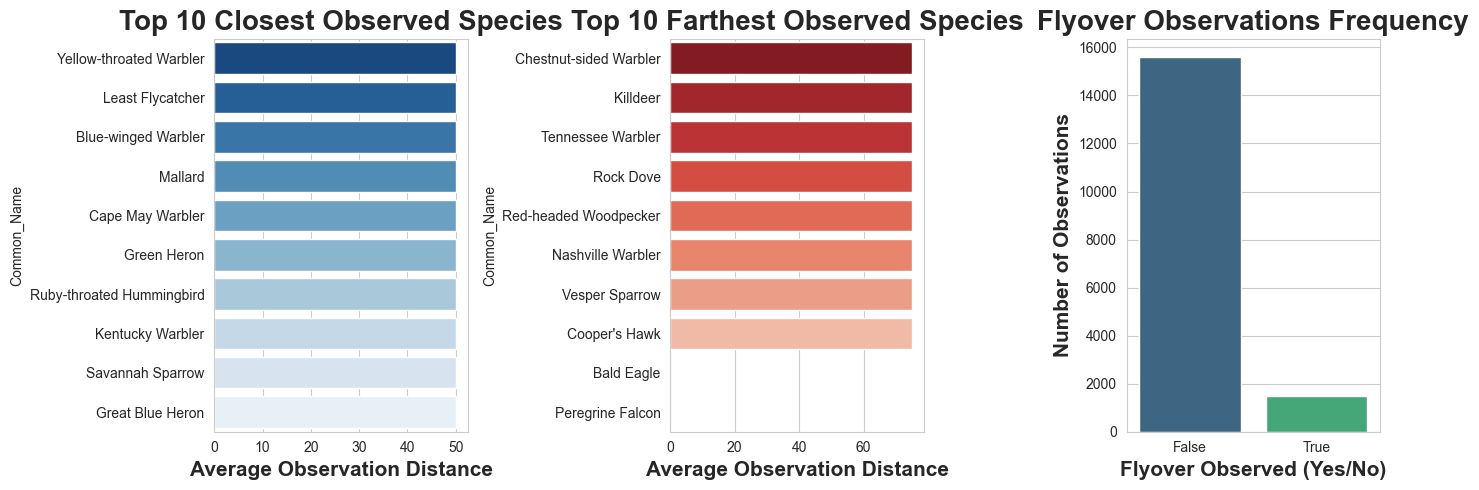

Processed data saved as C:\Users\aswin\3D Objects\guvi_project\Brid-species-observation-analysis\processed_data.csv


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt


species_distance = combined_df.groupby("Common_Name")["Distance"].mean().sort_values()

fig, axes = plt.subplots(1, 3, figsize=(14, 5))

# 1. Top 10 Closest Observed Species
sns.barplot(x=species_distance.head(10).values, y=species_distance.head(10).index, palette="Blues_r", ax=axes[0], hue=species_distance.head(10).index, dodge=False)
axes[0].set_title("Top 10 Closest Observed Species", fontsize=20, fontweight="bold")
axes[0].set_xlabel("Average Observation Distance", fontsize=15, fontweight="bold")

# 2. Top 10 Farthest Observed Species
sns.barplot(x=species_distance.tail(10).values, y=species_distance.tail(10).index, palette="Reds_r", ax=axes[1], hue=species_distance.tail(10).index, dodge=False)
axes[1].set_title("Top 10 Farthest Observed Species", fontsize=20, fontweight="bold")
axes[1].set_xlabel("Average Observation Distance", fontsize=15, fontweight="bold")

#3. Flyover Observations
flyover_counts = combined_df["Flyover_Observed"].value_counts()

sns.barplot(x=flyover_counts.index, y=flyover_counts.values, palette="viridis", ax=axes[2], hue=flyover_counts.index, dodge=False)
axes[2].set_title("Flyover Observations Frequency", fontsize=20, fontweight="bold")
axes[2].set_xlabel("Flyover Observed (Yes/No)", fontsize=15, fontweight="bold")
axes[2].set_ylabel("Number of Observations", fontsize=15, fontweight="bold")


plt.tight_layout()
plt.show()

# Save processed data
output_path = r'C:\Users\aswin\3D Objects\guvi_project\Brid-species-observation-analysis\processed_data.csv'
combined_df.to_csv(output_path, index=False)
print(f"Processed data saved as {output_path}")


In [26]:
observer_counts = combined_df["Observer"].value_counts()

print(observer_counts.head(10))  # Top 10 most active observers

Observer
Elizabeth Oswald    6391
Kimberly Serno      5902
Brian Swimelar      4784
Name: count, dtype: int64


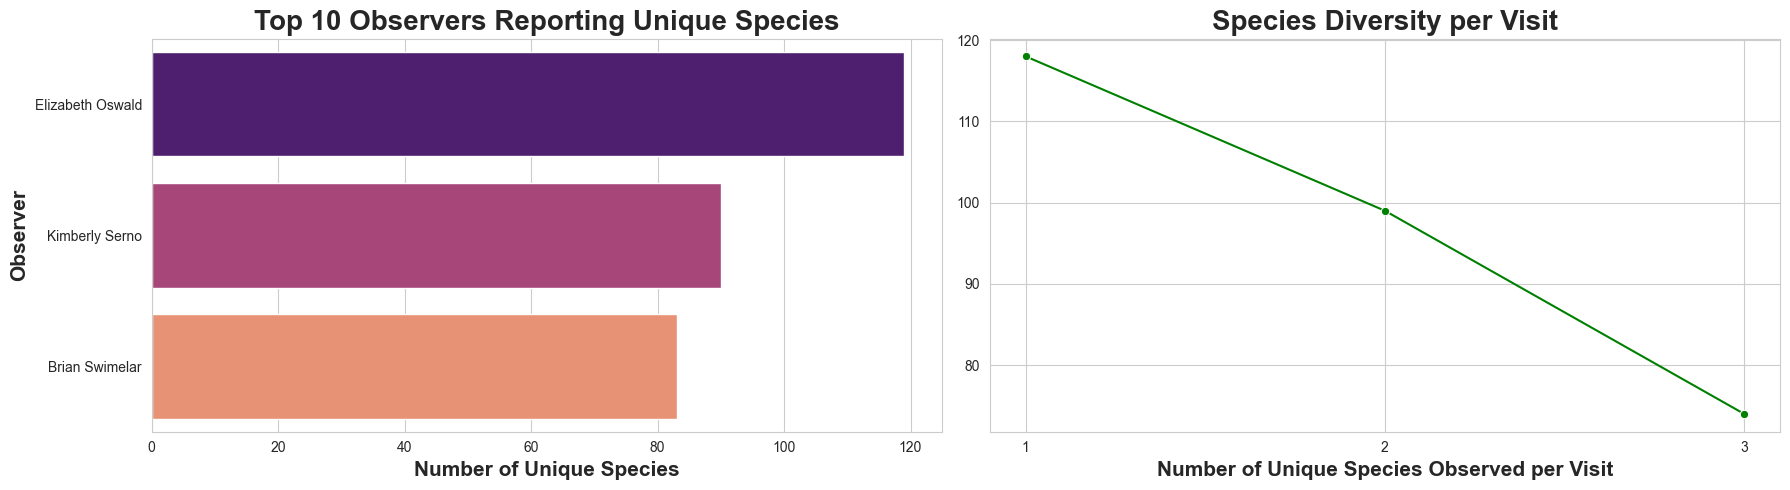

Processed data saved as C:\Users\aswin\3D Objects\guvi_project\Brid-species-observation-analysis\processed_data.csv


In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Count the total number of observations reported by each observer
observer_counts = combined_df["Observer"].value_counts()

# Analyze if specific observers tend to report certain species more frequently
observer_species_counts = combined_df.groupby("Observer")["Common_Name"].nunique().sort_values(ascending=False)

# Count unique species observed per visit
species_per_visit = combined_df.groupby("Visit")["Common_Name"].nunique().sort_values(ascending=False)

# Count the number of visits per plot
visit_counts = combined_df.groupby("Plot_Name")["Visit"].nunique().sort_values(ascending=False)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 5))


# 1. Observers Reporting the Most Unique Species
sns.barplot(x=observer_species_counts.head(10).values, y=observer_species_counts.head(10).index, palette="magma", ax=axes[0], hue=observer_species_counts.head(10).index, dodge=False)
axes[0].set_title("Top 10 Observers Reporting Unique Species", fontsize=20, fontweight="bold")
axes[0].set_xlabel("Number of Unique Species", fontsize=15, fontweight="bold")
axes[0].set_ylabel("Observer", fontsize=15, fontweight="bold")

# 3. Species Diversity per Visit
sns.lineplot(x=species_per_visit.index, y=species_per_visit.values, marker="o", ax=axes[1], color="green")
axes[1].set_title("Species Diversity per Visit", fontsize=20, fontweight="bold")
axes[1].set_xlabel("Number of Unique Species Observed per Visit", fontsize=15, fontweight="bold")

plt.tight_layout()
plt.show()

# Save processed data
output_path = r'C:\Users\aswin\3D Objects\guvi_project\Brid-species-observation-analysis\processed_data.csv'
combined_df.to_csv(output_path, index=False)
print(f"Processed data saved as {output_path}")

***Conservation Insights: Watchlist Trends and AOU Code Patterns***

In [28]:
# Re-import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Check the unique values in PIF_Watchlist_Status and Regional_Stewardship_Status
watchlist_counts = combined_df["PIF_Watchlist_Status"].value_counts()
stewardship_counts = combined_df["Regional_Stewardship_Status"].value_counts()

watchlist_counts, stewardship_counts

(PIF_Watchlist_Status
 False    16699
 True       378
 Name: count, dtype: int64,
 Regional_Stewardship_Status
 False    13092
 True      3985
 Name: count, dtype: int64)

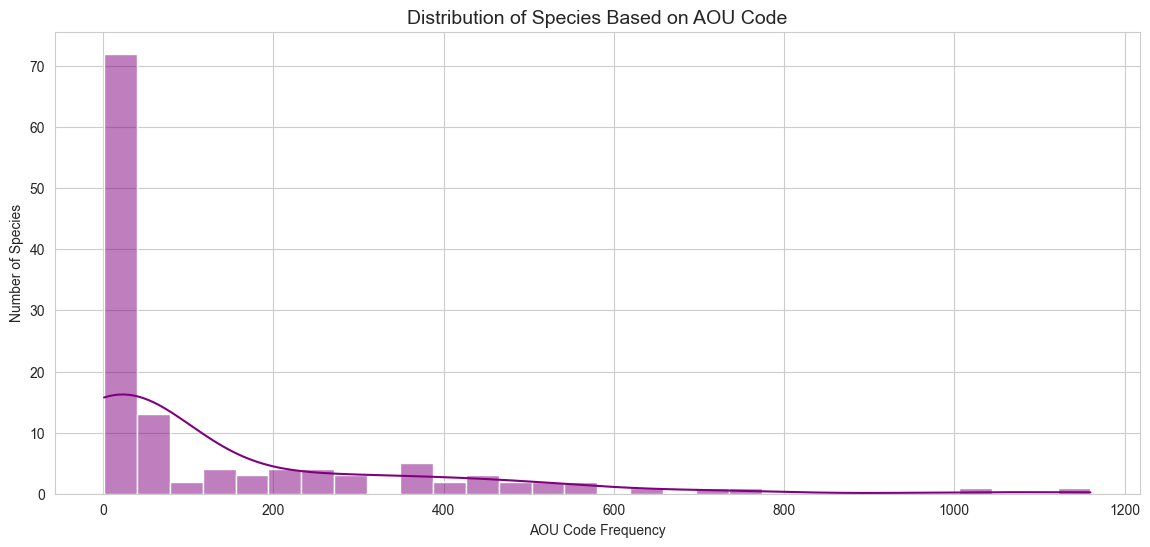

In [29]:
# Check the distribution of species based on AOU_Code
aou_code_counts = combined_df["AOU_Code"].value_counts().sort_values(ascending=False)

# Plot the distribution of AOU Codes
plt.figure(figsize=(14, 6))
sns.histplot(aou_code_counts, bins=30, kde=True, color="purple")
plt.title("Distribution of Species Based on AOU Code", fontsize=14)
plt.xlabel("AOU Code Frequency")
plt.ylabel("Number of Species")
plt.grid(True)
plt.show()

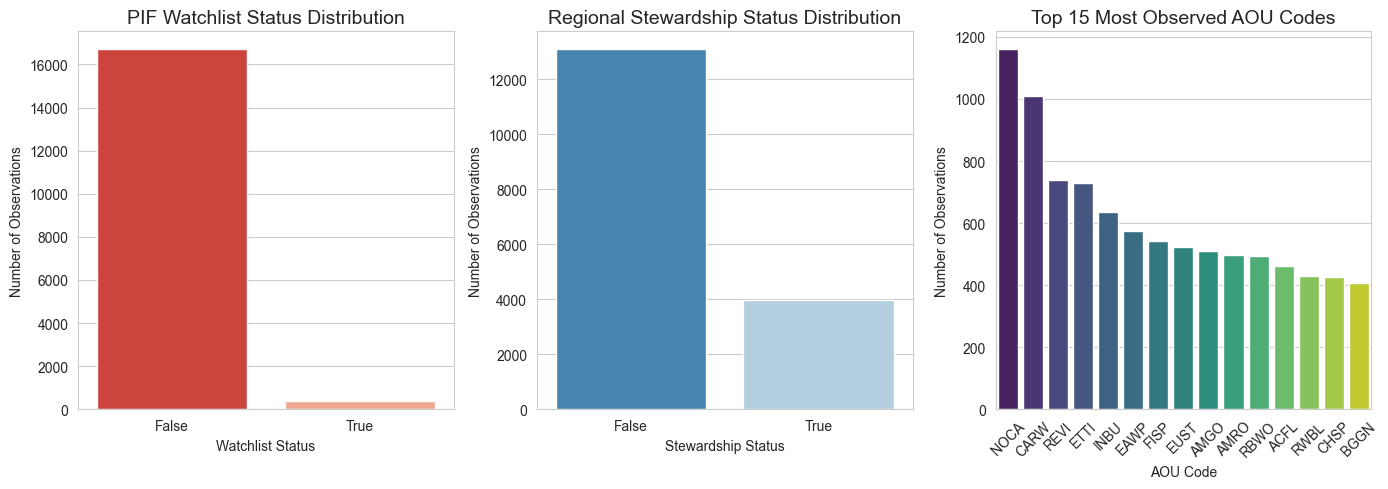

Processed data saved as C:\Users\aswin\3D Objects\guvi_project\Brid-species-observation-analysis\processed_data.csv


In [30]:
# PIF Watchlist Status Distribution
watchlist_counts = combined_df["PIF_Watchlist_Status"].value_counts()
# Regional Stewardship Status Distribution
stewardship_counts = combined_df["Regional_Stewardship_Status"].value_counts()
# Count species based on AOU_Code
aou_counts = combined_df["AOU_Code"].value_counts().head(15)  # Top 15 for readability

# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(14, 5))

# 1. PIF Watchlist Status Distribution
sns.barplot(x=watchlist_counts.index.astype(str), y=watchlist_counts.values, palette="Reds_r", ax=axes[0], hue=watchlist_counts.index)
axes[0].set_title("PIF Watchlist Status Distribution", fontsize=14)
axes[0].set_xlabel("Watchlist Status")
axes[0].set_ylabel("Number of Observations")

# 2. Regional Stewardship Status Distribution
sns.barplot(x=stewardship_counts.index.astype(str), y=stewardship_counts.values, palette="Blues_r", ax=axes[1], hue=stewardship_counts.index)
axes[1].set_title("Regional Stewardship Status Distribution", fontsize=14)
axes[1].set_xlabel("Stewardship Status")
axes[1].set_ylabel("Number of Observations")

# 3. Top 15 Most Observed AOU Codes
sns.barplot(x=aou_counts.index, y=aou_counts.values, palette="viridis", ax=axes[2], hue=aou_counts.index)
axes[2].set_title("Top 15 Most Observed AOU Codes", fontsize=14)
axes[2].set_xlabel("AOU Code")
axes[2].set_ylabel("Number of Observations")
axes[2].tick_params(axis='x', rotation=45)

# Adjust layout and show plots
plt.tight_layout()
plt.show()

# Save processed data
output_path = r'C:\Users\aswin\3D Objects\guvi_project\Brid-species-observation-analysis\processed_data.csv'
combined_df.to_csv(output_path, index=False)
print(f"Processed data saved as {output_path}")


***Store Processed Data to the Database***

In [ ]:
import pandas as pd
import sqlite3

# Load CSV file
csv_file = r'C:\Users\aswin\3D Objects\guvi_project\Brid-species-observation-analysis\processed_data.csv'
df = pd.read_csv(csv_file, low_memory=False)

# Create SQLite database and table
conn = sqlite3.connect("bird_monitoring.db")
df.to_sql("bird_data", conn, if_exists="replace", index=False)
conn.close()

print("Database created and data inserted successfully!")


Database created and data inserted successfully!
